In [1]:
import copy
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

In [2]:
from PIL import Image
from PIL.ImageOps import invert
from IPython.display import display 

In [3]:
import json

In [4]:
#m_a = np.random.randint(2, size=(84,84))

In [5]:
#m_a = np.zeros((84,84))

In [6]:
#m_a

In [7]:
# plt.imshow(a, cmap="gray")
# plt.show()

In [8]:
# pts = np.array([[10,5],[20,30],[70,20],[50,10]], np.int32)
# pts = pts.reshape((-1,1,2))

In [9]:
#pts

In [10]:
#cv2.fillPoly(m_a,[pts],(1.0,1.0,1.0))

In [11]:
#cv2.polylines(a,[pts],True,(255,255,255))

In [12]:
#m_a = m_a / 255.0

In [13]:
#plt.imshow(m_a, cmap="gray")
#plt.show()

In [14]:
def point_line_symmetry(x_0, y_0, a, b, c):
    # x_1 = ((a**2 - b**2)*x_0 - 2*a*b*y_0 - 2*b*c)/(a**2 + b**2)
    # y_1 = ((b**2 - a**2)*y_0 - 2*a*b*x_0 - 2*a*c)/(a**2 + b**2)
    
    x_1 = ((b**2 - a**2)*x_0 - 2*a*b*y_0 - 2*a*c)/(a**2 + b**2)
    y_1 = ((a**2 - b**2)*y_0 - 2*a*b*x_0 - 2*b*c)/(a**2 + b**2)
    
    return x_1, y_1

In [15]:
#point_line_symmetry(0,9,2,1,-20)

In [16]:
def matrix_line_symmetry(matrix, a, b, c):
    up_sum = 0
    down_sum = 0
    
    assert len(matrix) > 0 and len(matrix[0]) > 0
    row = len(matrix)
    col = len(matrix[0])
    for i in range(row):
        for j in range(col):
            if matrix[i][j] > 0:
                point_sign = a * i + b * j + c
                if point_sign < 0:
                    down_sum += 1
                elif point_sign > 0:
                    up_sum += 1
    
    if up_sum < down_sum:
        fold_direction = 1
    else:
        fold_direction = -1
    
    new_matrix = np.zeros((row, col))
    for i in range(row):
        for j in range(col):
            if matrix[i][j] > 0:
                point_sign = a * i + b * j + c
                #print("point sign", i, j, point_sign)
                if fold_direction * point_sign > 0:
                    new_point = point_line_symmetry(i, j, a, b, c)
                    round_x = round(new_point[0])
                    round_y = round(new_point[1])
                    if round_x >= 0 and round_x < row and round_y >= 0 and round_y < col:
                        new_matrix[round_x][round_y] = 1.0
                else:
                    new_matrix[i][j] = 1.0
    
    return new_matrix

In [17]:
#plt.imshow(m_a, cmap="gray")
#plt.show()

In [18]:
#m_b = matrix_line_symmetry(m_a, 1, -1, 0)

In [19]:
#plt.imshow(m_b, cmap="gray")
#plt.show()

In [20]:
def read_cloth_image(cloth_file):
    im = Image.open(cloth_file).convert("L")
    display(im)
    im_np = np.asarray(im)
    im_np = 1 - im_np / 255.0
    
    for i in range(len(im_np)):
        for j in range(len(im_np[0])):
            if im_np[i][j] > 0:
                im_np[i][j] = 1
    
    return im_np

In [24]:
cloth_folder = "data/clothes/"

In [352]:
cloth_name = "Tshirt4-01.png"

In [353]:
cloth_file = cloth_folder + cloth_name

In [354]:
save_fold_folder = "data/fold_validation/" + cloth_name.split(".")[0]

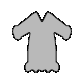

In [355]:
cloth_img = read_cloth_image(cloth_file)

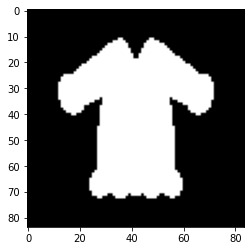

In [356]:
plt.imshow(cloth_img, cmap="gray")

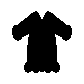

In [357]:
cloth_img_bw = Image.fromarray(np.uint8(cloth_img * 255) , 'L')
cloth_img_bw = invert(cloth_img_bw)
display(cloth_img_bw)

In [358]:
if not os.path.exists(save_fold_folder):
    os.mkdir(save_fold_folder)

In [359]:
cloth_img_bw.save(save_fold_folder + "/0.png")

In [360]:
move_seq = []

In [361]:
step = 0

In [362]:
#
#
#
#

In [400]:
a, b, c = 1, 0, -56

In [401]:
cloth_img_2 = matrix_line_symmetry(cloth_img, a, b, c)

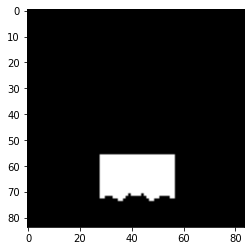

In [402]:
plt.imshow(cloth_img_2, cmap="gray")
plt.show()

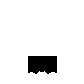

In [403]:
cloth_img_3 = Image.fromarray(np.uint8(cloth_img_2 * 255) , 'L')
cloth_img_3 = invert(cloth_img_3)
display(cloth_img_3)

------------------

In [404]:
# save
move_seq.append([a, b, c])

In [405]:
step += 1

In [406]:
step

4

In [407]:
cloth_img_3.save(save_fold_folder + "/" + str(step) + ".png")

In [408]:
cloth_img = cloth_img_2

In [409]:
cloth_img

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

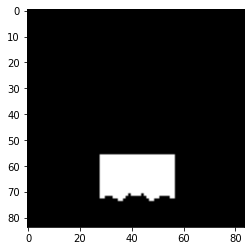

In [410]:
plt.imshow(cloth_img, cmap="gray")
plt.show()

In [411]:
move_seq

[[0, 1, -28], [0, 1, -56], [1, 0, -42], [1, 0, -56]]